In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os


# Open and Play the Original Video

In [73]:
video_path = "DaytoNight.mp4"
delta_frames_ms = 25

cap = cv.VideoCapture(video_path)


if cap.isOpened():
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Video Ended.")
            break

        
        cv.imshow("Video",frame)

        if cv.waitKey(delta_frames_ms) &  0xFF == ord('q') :
            break
    
    cap.release()
    cv.destroyAllWindows()


else:
    print("Couldn't Open Video.")


    

# Save Random Frames from the Video

In [7]:
import random

In [74]:
video_path = "DaytoNight.mp4"
saved_frames_dir = "saved_frames"

os.makedirs(saved_frames_dir, exist_ok=True)

In [75]:
cap = cv.VideoCapture(video_path)

if not cap.isOpened():
    print("Video couldnt open")
    exit()

# Get Total Frames in Video
n_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
print("Total Number of Frames = ", n_frames)


Total Number of Frames =  10218


In [76]:
num_of_frames_to_save = 20

# Random Frames Indicies
random_frames = sorted(random.sample(range(n_frames), num_of_frames_to_save))
print("Random frame indices:", random_frames)

Random frame indices: [269, 1140, 1499, 1638, 1776, 4307, 4436, 4602, 5297, 5383, 5604, 5618, 5676, 5878, 7004, 7160, 8041, 8116, 8153, 9148]


In [77]:
id=1
for frame_n in random_frames:
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_n)
    
    ret, frame = cap.read()

    if not ret:
        print(f"Warning: Could not read frame {frame_n}") 
        continue

    # Save frame as image
    frame_filename = os.path.join(saved_frames_dir, f"frame_{id}.jpg")
    cv.imwrite(frame_filename, frame)
    print(f"Saved: {frame_filename}")
    id+=1

Saved: saved_frames/frame_1.jpg
Saved: saved_frames/frame_2.jpg
Saved: saved_frames/frame_3.jpg
Saved: saved_frames/frame_4.jpg
Saved: saved_frames/frame_5.jpg
Saved: saved_frames/frame_6.jpg
Saved: saved_frames/frame_7.jpg
Saved: saved_frames/frame_8.jpg
Saved: saved_frames/frame_9.jpg
Saved: saved_frames/frame_10.jpg
Saved: saved_frames/frame_11.jpg
Saved: saved_frames/frame_12.jpg
Saved: saved_frames/frame_13.jpg
Saved: saved_frames/frame_14.jpg
Saved: saved_frames/frame_15.jpg
Saved: saved_frames/frame_16.jpg
Saved: saved_frames/frame_17.jpg
Saved: saved_frames/frame_18.jpg
Saved: saved_frames/frame_19.jpg
Saved: saved_frames/frame_20.jpg


### TEST WITH SINGLE IMAGE

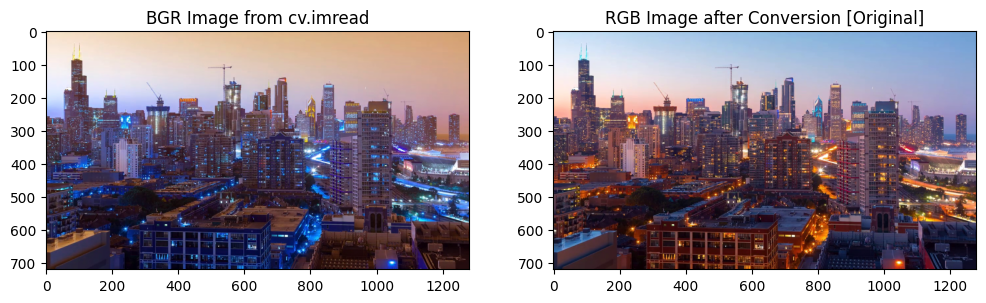

In [80]:
test_img = cv.imread("saved_frames/frame_20.jpg")
test_img_rgb = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('BGR Image from cv.imread')
plt.imshow(test_img)
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)


# Gray Scale Conversion

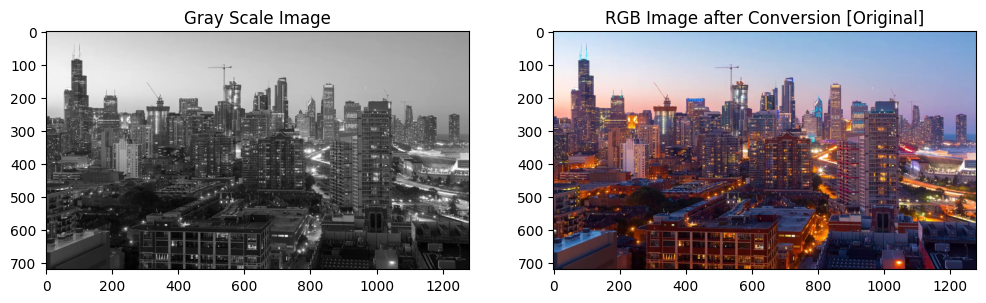

In [81]:
test_img_gray = cv.cvtColor(test_img_rgb, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Gray Scale Image')
plt.imshow(test_img_gray, cmap='gray')
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

In [82]:
print(f"Original RGB Image Shape: {test_img_rgb.shape}")
print(f"Gray Image Shape: {test_img_gray.shape}")


Original RGB Image Shape: (720, 1280, 3)
Gray Image Shape: (720, 1280)


## Blur

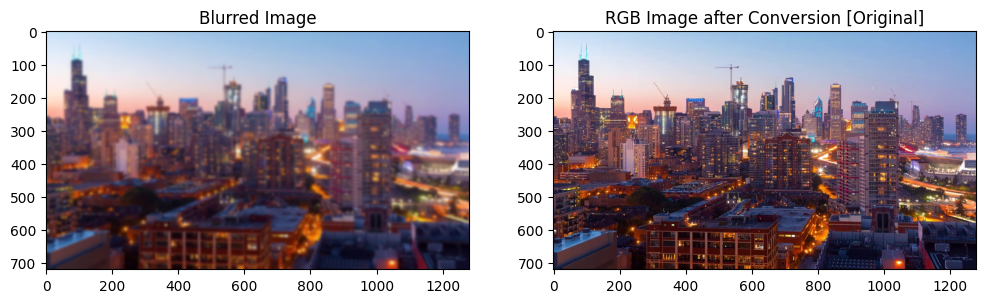

In [83]:
test_img_blur = cv.GaussianBlur(test_img_rgb, (21,21),0)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Blurred Image')
plt.imshow(test_img_blur)
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

## Bilateral Filter 

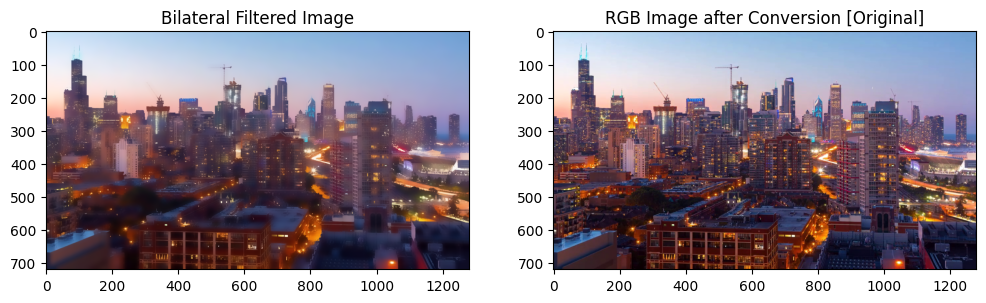

In [84]:
test_img_bilateral = cv.bilateralFilter(test_img_rgb, 25,95,95)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Bilateral Filtered Image')
plt.imshow(test_img_bilateral)
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

## Canny Edge Detection Filter

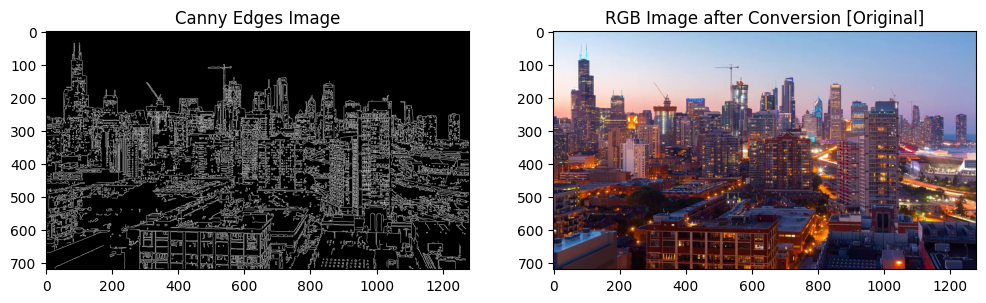

In [85]:
test_img_edges = cv.Canny(test_img_rgb, 100, 200)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Canny Edges Image')
plt.imshow(test_img_edges,cmap='gray')
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

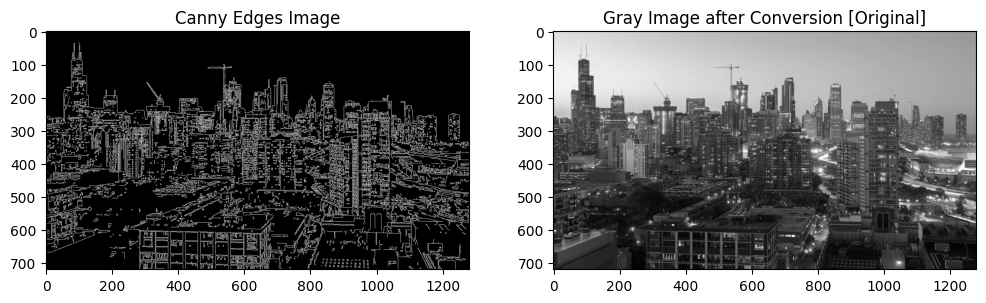

In [86]:
test_img_edges = cv.Canny(test_img_gray, 100, 200)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Canny Edges Image')
plt.imshow(test_img_edges,cmap='gray')
plt.subplot(1,2,2)
plt.title('Gray Image after Conversion [Original]')
plt.imshow(test_img_gray,cmap='gray')

# Image Manipulation

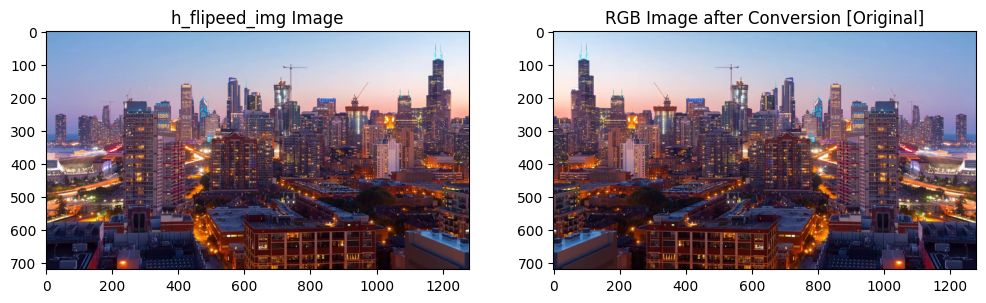

In [87]:
h_flipeed_img = cv.flip(test_img_rgb, 1)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('h_flipeed_img Image')
plt.imshow(h_flipeed_img)
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

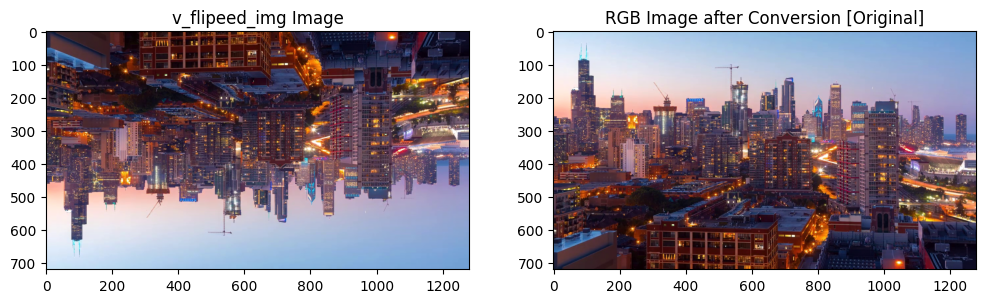

In [88]:
v_flipeed_img = cv.flip(test_img_rgb, 0)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('v_flipeed_img Image')
plt.imshow(v_flipeed_img)
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

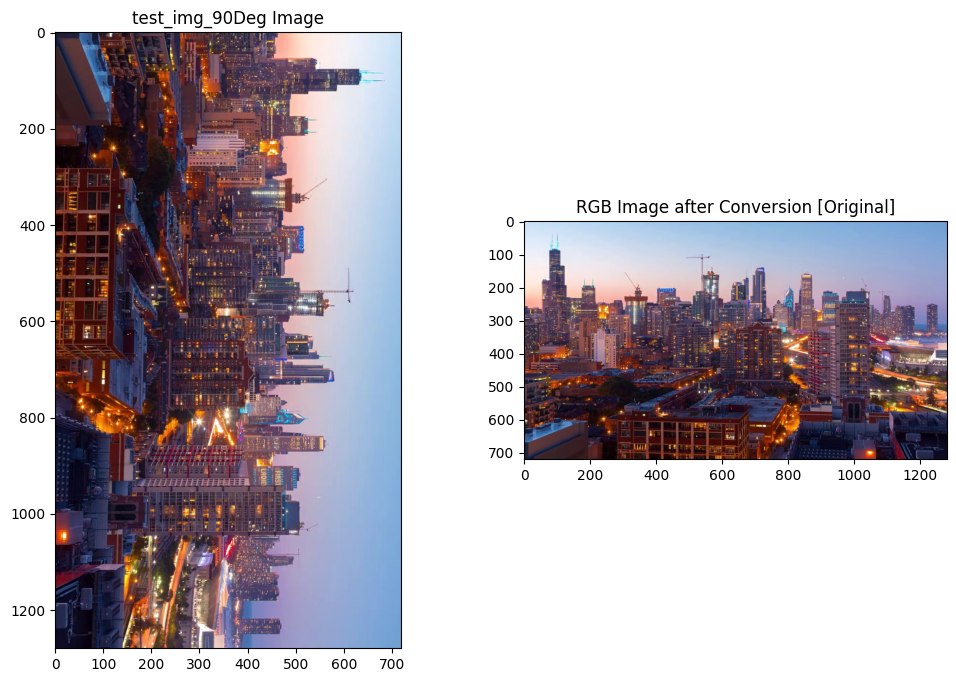

In [89]:
test_img_90Deg = cv.rotate(test_img_rgb, cv.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('test_img_90Deg Image')
plt.imshow(test_img_90Deg)
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

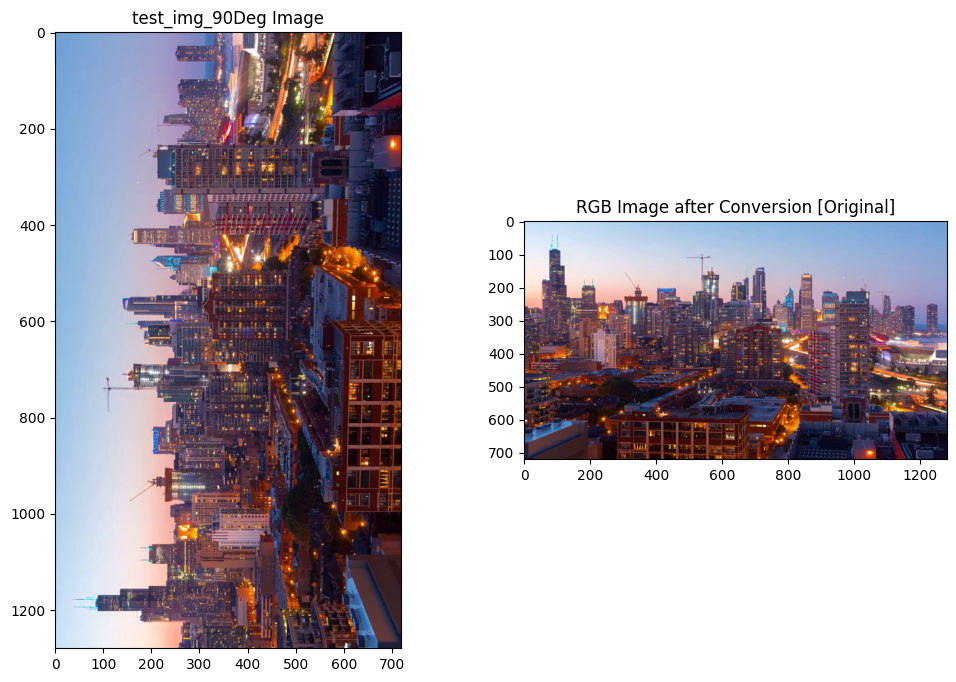

In [90]:
test_img_90Deg = cv.rotate(test_img_rgb, cv.ROTATE_90_COUNTERCLOCKWISE)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('test_img_90Deg Image')
plt.imshow(test_img_90Deg)
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

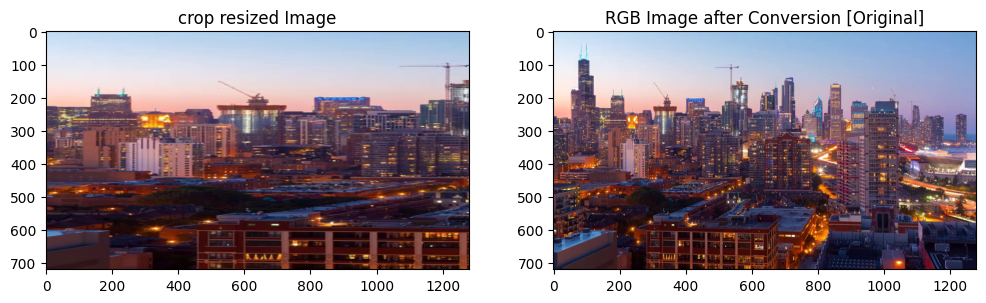

In [93]:
width,height = test_img_rgb.shape[:2]
crop_per = 0.6
crop_size = (int(height*crop_per), int(width*crop_per))

y = random.randint(0, height-crop_size[0])
x = random.randint(0, width-crop_size[1])

cropped_img = test_img_rgb[y:y+crop_size[0], x:x+crop_size[1]]

crop_resized = cv.resize(cropped_img, (height,width))


plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.title('crop resized Image')
plt.imshow(crop_resized)
plt.subplot(1,2,2)
plt.title('RGB Image after Conversion [Original]')
plt.imshow(test_img_rgb)

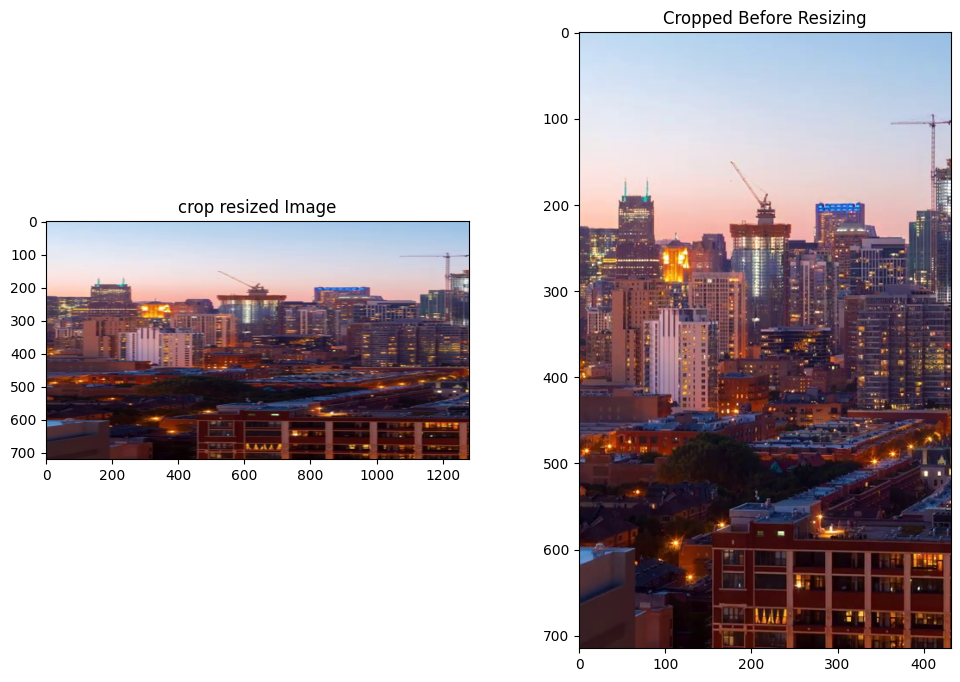

In [94]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('crop resized Image')
plt.imshow(crop_resized)
plt.subplot(1,2,2)
plt.title('Cropped Before Resizing')
plt.imshow(cropped_img)